In [49]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from nltk import corpus
import re
import ast
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import datasets, linear_model

In [2]:
# Load the datasets
Raw_recipes = pd.read_csv('raw_recipes.csv')
Raw_ints = pd.read_csv('raw_interactions.csv')

In [56]:
Raw_recipes

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'side-dishes', 'vegetables', 'mexican', 'easy', 'fall', 'holiday-event', 'vegetarian', 'winter', 'dietary', 'christmas', 'seasonal', 'squash']","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'depending on size of squash , cut into half or fourths', 'remove seeds', 'for spicy squash , drizzle olive oil or melted butter over each cut squash piece', 'season with mexican seasoning mix ii', 'for sweet squash , drizzle melted honey , butter , grated piloncillo over each cut squash piece', 'season with sweet mexican spice mix', 'bake at 350 degrees , again depending on size , for 40 minutes up to an hour , until a fork can easily pierce the skin', 'be careful not to burn the squash especially if you opt to use sugar or butter', 'if you feel more comfortable , cover the squash with aluminum foil the first half hour , give or take , of baking', 'if desired , season with salt']","autumn is my favorite time of year to cook! this recipe \r\ncan be prepared either spicy or sweet, your choice!\r\ntwo of my posted mexican-inspired seasoning mix recipes are offered as suggestions.","['winter squash', 'mexican seasoning', 'mixed spice', 'honey', 'butter', 'olive oil', 'salt']",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'breakfast', 'main-dish', 'pork', 'american', 'oven', 'easy', 'kid-friendly', 'pizza', 'dietary', 'northeastern-united-states', 'meat', 'equipment']","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough into the bottom and sides of a 12 inch pizza pan', 'bake for 5 minutes until set but not browned', 'cut sausage into small pieces', 'whisk eggs and milk in a bowl until frothy', 'spoon sausage over baked crust and sprinkle with cheese', 'pour egg mixture slowly over sausage and cheese', 's& p to taste', 'bake 15-20 minutes or until eggs are set and crust is brown']",this recipe calls for the crust to be prebaked a bit before adding ingredients. feel free to change sausage to ham or bacon. this warms well in the microwave for those late risers.,"['prepared pizza crust', 'sausage patty', 'eggs', 'milk', 'salt and pepper', 'cheese']",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'main-dish', 'chili', 'crock-pot-slow-cooker', 'dietary', 'equipment', '4-hours-or-less']","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add chopped onions to ground beef when almost brown and sautee until wilted', 'add all other ingredients', 'add kidney beans if you like beans in your chili', 'cook in slow cooker on high for 2-3 hours or 6-8 hours on low', 'serve with cold clean lettuce and shredded cheese']",this modified version of 'mom's' chili was a hit at our 2004 christmas party. we made an extra large pot to have some left to freeze but it never made it to the freezer. it was a favorite by all. perfect for any cold and rainy day. you won't find this one in a cookbook. it is truly an original.,"['ground beef', 'yellow onions', 'diced tomatoes', 'tomato paste', 'tomato soup', 'rotel tomatoes', 'kidney beans', 'water', 'chili powder', 'ground cumin', 'salt', 'lettuce', 'cheddar cheese']",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'preparation', 'occasion', 'side-dishes', 'eggs-dairy', 'potatoes', 'vegetables', 'oven', 'easy', 'dinner-party', 'holiday-event', 'easter', 'cheese', 'stove-top', 'dietary', 'christmas', 'new-years', 'thanksgiving', 'independence-day', 'st-pat

In [3]:
# Perform basic EDA
print(Raw_recipes.describe())
print(Raw_recipes.isnull().sum())
print(Raw_recipes.dtypes)

                  id       minutes  contributor_id        n_steps  \
count  231637.000000  2.316370e+05    2.316370e+05  231637.000000   
mean   222014.708984  9.398546e+03    5.534885e+06       9.765499   
std    141206.635626  4.461963e+06    9.979141e+07       5.995128   
min        38.000000  0.000000e+00    2.700000e+01       0.000000   
25%     99944.000000  2.000000e+01    5.690500e+04       6.000000   
50%    207249.000000  4.000000e+01    1.736140e+05       9.000000   
75%    333816.000000  6.500000e+01    3.982750e+05      12.000000   
max    537716.000000  2.147484e+09    2.002290e+09     145.000000   

       n_ingredients  
count  231637.000000  
mean        9.051153  
std         3.734796  
min         1.000000  
25%         6.000000  
50%         9.000000  
75%        11.000000  
max        43.000000  
name                 1
id                   0
minutes              0
contributor_id       0
submitted            0
tags                 0
nutrition            0
n_steps   

In [4]:
print(Raw_ints.describe())
print(Raw_ints.isnull().sum())
print(Raw_ints.dtypes)

            user_id     recipe_id        rating
count  1.132367e+06  1.132367e+06  1.132367e+06
mean   1.384291e+08  1.608972e+05  4.411016e+00
std    5.014269e+08  1.303987e+05  1.264752e+00
min    1.533000e+03  3.800000e+01  0.000000e+00
25%    1.354700e+05  5.425700e+04  4.000000e+00
50%    3.309370e+05  1.205470e+05  5.000000e+00
75%    8.045500e+05  2.438520e+05  5.000000e+00
max    2.002373e+09  5.377160e+05  5.000000e+00
user_id        0
recipe_id      0
date           0
rating         0
review       169
dtype: int64
user_id       int64
recipe_id     int64
date         object
rating        int64
review       object
dtype: object


Nutrition Dummies

In [5]:
Nutri_Cols = pd.DataFrame(Raw_recipes['nutrition'].str.strip('[]').str.replace(',', '').str.split().to_list())

In [6]:
Nutri_Cols.columns = ['Calories (#)', 'Total Fat (PDV)', 'Sugar (PDV)', 'Sodium (PDV)', 'Protein (PDV)', 'Saturated Fat', 'Carbohydrates (PDV)'] 


In [7]:
Nutri_Cols

,Calories (#),Total Fat (PDV),Sugar (PDV),Sodium (PDV),Protein (PDV),Saturated Fat,Carbohydrates (PDV)
0,51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,269.8,22.0,32.0,48.0,39.0,27.0,5.0
3,368.1,17.0,10.0,2.0,14.0,8.0,20.0
4,352.9,1.0,337.0,23.0,3.0,0.0,28.0
...,...,...,...,...,...,...,...
231632,415.2,26.0,34.0,26.0,44.0,21.0,15.0
231633,14.8,0.0,2.0,58.0,1.0,0.0,1.0
231634,59.2,6.0,2.0,3.0,6.0,5.0,0.0
231635,188.0,11.0,57.0,11.0,7.0,21.0,9.0


In [8]:
c = Raw_recipes.drop(columns = ['nutrition'])

In [112]:
b = c.join(Nutri_Cols)

In [10]:
food_nutrition = FN_b.copy()

In [12]:
food_nutrition.head(5)

,name,id,minutes,contributor_id,submitted,tags,n_steps,steps,description,ingredients,n_ingredients,Calories (#),Total Fat (PDV),Sugar (PDV),Sodium (PDV),Protein (PDV),Saturated Fat,Carbohydrates (PDV)
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'side-dishes', 'vegetables', 'mexican', 'easy', 'fall', 'holiday-event', 'vegetarian', 'winter', 'dietary', 'christmas', 'seasonal', 'squash']",11,"['make a choice and proceed with recipe', 'depending on size of squash , cut into half or fourths', 'remove seeds', 'for spicy squash , drizzle olive oil or melted butter over each cut squash piece', 'season with mexican seasoning mix ii', 'for sweet squash , drizzle melted honey , butter , grated piloncillo over each cut squash piece', 'season with sweet mexican spice mix', 'bake at 350 degrees , again depending on size , for 40 minutes up to an hour , until a fork can easily pierce the skin', 'be careful not to burn the squash especially if you opt to use sugar or butter', 'if you feel more comfortable , cover the squash with aluminum foil the first half hour , give or take , of baking', 'if desired , season with salt']","autumn is my favorite time of year to cook! this recipe \r\ncan be prepared either spicy or sweet, your choice!\r\ntwo of my posted mexican-inspired seasoning mix recipes are offered as suggestions.","['winter squash', 'mexican seasoning', 'mixed spice', 'honey', 'butter', 'olive oil', 'salt']",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'breakfast', 'main-dish', 'pork', 'american', 'oven', 'easy', 'kid-friendly', 'pizza', 'dietary', 'northeastern-united-states', 'meat', 'equipment']",9,"['preheat oven to 425 degrees f', 'press dough into the bottom and sides of a 12 inch pizza pan', 'bake for 5 minutes until set but not browned', 'cut sausage into small pieces', 'whisk eggs and milk in a bowl until frothy', 'spoon sausage over baked crust and sprinkle with cheese', 'pour egg mixture slowly over sausage and cheese', 's& p to taste', 'bake 15-20 minutes or until eggs are set and crust is brown']",this recipe calls for the crust to be prebaked a bit before adding ingredients. feel free to change sausage to ham or bacon. this warms well in the microwave for those late risers.,"['prepared pizza crust', 'sausage patty', 'eggs', 'milk', 'salt and pepper', 'cheese']",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'main-dish', 'chili', 'crock-pot-slow-cooker', 'dietary', 'equipment', '4-hours-or-less']",6,"['brown ground beef in large pot', 'add chopped onions to ground beef when almost brown and sautee until wilted', 'add all other ingredients', 'add kidney beans if you like beans in your chili', 'cook in slow cooker on high for 2-3 hours or 6-8 hours on low', 'serve with cold clean lettuce and shredded cheese']",this modified version of 'mom's' chili was a hit at our 2004 christmas party. we made an extra large pot to have some left to freeze but it never made it to the freezer. it was a favorite by all. perfect for any cold and rainy day. you won't find this one in a cookbook. it is truly an original.,"['ground beef', 'yellow onions', 'diced tomatoes', 'tomato paste', 'tomato soup', 'rotel tomatoes', 'kidney beans', 'water', 'chili powder', 'ground cumin', 'salt', 'lettuce', 'cheddar cheese']",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'preparation', 'occasion', 'side-dishes', 'eggs-dairy', 'potatoes', 'vegetables', 'oven', 'easy', 'dinner-party', 'holiday-event', 'easter', 'cheese', 'stove-top', 'dietary', 'christ

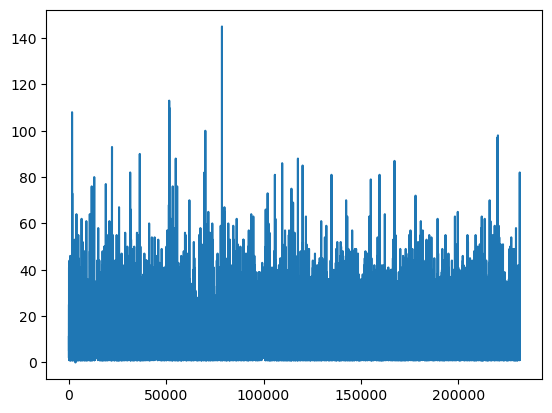

In [13]:
food_nutrition["n_steps"].plot()
plt.show()

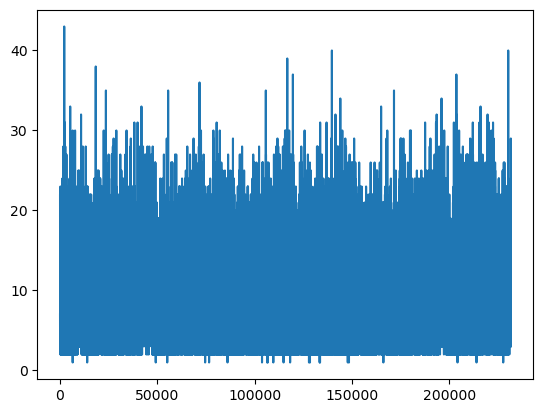

In [14]:
food_nutrition["n_ingredients"].plot()
plt.show()

In [15]:
food_nutrition["ingredients"].str.replace(",", "").sample(20)

133181                                                                                                                           ['olive oil' 'garlic' 'red onion' 'scallion' 'tomatoes' 'dry white wine' 'feta cheese' 'bow tie pasta' 'medium shrimp' 'kalamata olive' 'butter' 'fresh ground black pepper']
122681                                                                                                                                                      ['all-purpose flour' 'poppy seeds' 'salt' 'sugar' 'unsalted butter' 'egg yolks' 'vanilla extract' 'lemon zest' 'blanched almond' 'powdered sugar']
175592                                                                                                                                                                       ['garlic' 'lemon' 'butter' 'fresh rosemary' 'salt' 'pepper' 'roasting chickens' 'chicken broth' 'all-purpose flour' 'white wine']
154832                                                                                     

In [135]:
X = FN_b.drop(['rating'], axis=1) # independent
y = FN_b['rating']

TypeError: 'value' must be an instance of str or bytes, not a float

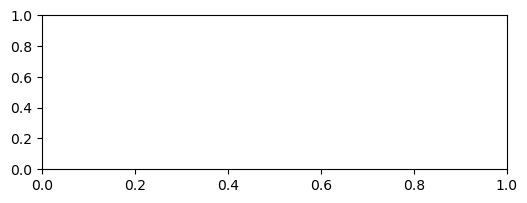

In [136]:
for col in X.columns: 
    plt.figure(figsize=(6,2))
    plt.scatter(X[col], y)
    plt.ylabel('Cirrhosis Death Rate')
    plt.xlabel(col)
    plt.show();

In [ ]:
FN_b = b.set_index('id').join(Avg_rating)
X = FN_b.drop(['rating', 'name', 'tags', 'steps', 'description', 'ingredients', 'submitted'], axis=1) # independent
y = FN_b['rating']


In [14]:
Avg_rating

NameError: name 'Avg_rating' is not defined

In [ ]:
# Add a constant for the intercept
X_withconstant = sm.add_constant(X)
#est = sm.OLS(y, X.astype(float)).fit()

# Instantiate and fit the model
myregression = sm.OLS(y, X_withconstant.astype(float))
myregression_results = myregression.fit()

print(myregression_results.summary())

Ingredients dummy data

In [16]:
import re

def my_tokenizer(ingredient_string):
    ingredient_string = re.sub(r"[,\"]", "", ingredient_string)
    tokens = ingredient_string.lower().split("'")
    tokens = [word.strip() for word in tokens]
    tokens = [word for word in tokens if len(word) > 0]
    
    return tokens
    


vectorizer = CountVectorizer(tokenizer=my_tokenizer, max_features=500)

n = vectorizer.fit_transform(food_nutrition["ingredients"])

ingredients_dummy = pd.DataFrame(n.toarray(), columns=vectorizer.get_feature_names())
ingredients_dummy.head()

,[,],active dry yeast,all-purpose flour,allspice,almond extract,almonds,american cheese,apple,apple cider,...,whole wheat flour,worcestershire sauce,yeast,yellow bell pepper,yellow cake mix,yellow cornmeal,yellow onion,yellow onions,yogurt,zucchini
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
ingredients_dummy.shape

(231637, 500)

In [24]:
FN_Ingredient_Dummy.shape

(231637, 518)

In [22]:
FN_Ingredient_Dummy = food_nutrition.join(ingredients_dummy)

In [25]:
FN_Ingredient_Dummy.shape

(231637, 518)

Steps Dummies

In [18]:
food_nutrition["steps"].sample(10)

158771                                                                                                                                                                                                                                                                                                                                                                                            ['add salt and pepper to taste to the fish , and break into pieces', 'for the parsley sauce: mix all ingredients in a food procesor and reserve', 'for the traditional red sauce: mix all ingredients in a food procesor and reserve', 'spread each fish loin , one with green sauce , and the other with red sauce', 'add salt and grill , not directly into the flame', 'serve with additional sauce']
130443    ['drain maraschino cherries , reserving 1 tsp juice', 'combine flour , cocoa , salt , and baking powder in large bowl , mix well', 'put butter and sugar in medium bowl and beat with mixer on medium for 3-4 minut

In [20]:
vectorizer = CountVectorizer(tokenizer=my_tokenizer, max_features=500)

n = vectorizer.fit_transform(food_nutrition["steps"])

steps_dummy = pd.DataFrame(n.toarray(), columns=vectorizer.get_feature_names())
steps_dummy.head(10)

,),1,2,3,4,5,6,7,8,9,...,uncover,variations:,when it,whisk to combine,whisk until smooth,x 2-in,x 9-in,you,you don,yum !
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
steps_dummy.columns

Index([')', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       'uncover', 'variations:', 'when it', 'whisk to combine',
       'whisk until smooth', 'x 2-in', 'x 9-in', 'you', 'you don', 'yum !'],
      dtype='object', length=500)

In [26]:
Avg_rating = Raw_ints.groupby('recipe_id').mean('rating')

In [27]:
Avg_rating = Avg_rating.drop(columns='user_id')

In [32]:
FN_Ingredients_log = FN_Ingredient_Dummy.set_index('id').join(Avg_rating)

In [63]:
FN_Ingredients_log

,name,minutes,contributor_id,submitted,tags,n_steps,steps,description,ingredients,n_ingredients,...,worcestershire sauce,yeast,yellow bell pepper,yellow cake mix,yellow cornmeal,yellow onion,yellow onions,yogurt,zucchini,rating
id,,,,,,,,,,,,,,,,,,,,,
137739,arriba baked winter squash mexican style,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'side-dishes', 'vegetables', 'mexican', 'easy', 'fall', 'holiday-event', 'vegetarian', 'winter', 'dietary', 'christmas', 'seasonal', 'squash']",11,"['make a choice and proceed with recipe', 'depending on size of squash , cut into half or fourths', 'remove seeds', 'for spicy squash , drizzle olive oil or melted butter over each cut squash piece', 'season with mexican seasoning mix ii', 'for sweet squash , drizzle melted honey , butter , grated piloncillo over each cut squash piece', 'season with sweet mexican spice mix', 'bake at 350 degrees , again depending on size , for 40 minutes up to an hour , until a fork can easily pierce the skin', 'be careful not to burn the squash especially if you opt to use sugar or butter', 'if you feel more comfortable , cover the squash with aluminum foil the first half hour , give or take , of baking', 'if desired , season with salt']","autumn is my favorite time of year to cook! this recipe \r\ncan be prepared either spicy or sweet, your choice!\r\ntwo of my posted mexican-inspired seasoning mix recipes are offered as suggestions.","['winter squash', 'mexican seasoning', 'mixed spice', 'honey', 'butter', 'olive oil', 'salt']",7,...,0,0,0,0,0,0,0,0,0,5.0
31490,a bit different breakfast pizza,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'breakfast', 'main-dish', 'pork', 'american', 'oven', 'easy', 'kid-friendly', 'pizza', 'dietary', 'northeastern-united-states', 'meat', 'equipment']",9,"['preheat oven to 425 degrees f', 'press dough into the bottom and sides of a 12 inch pizza pan', 'bake for 5 minutes until set but not browned', 'cut sausage into small pieces', 'whisk eggs and milk in a bowl until frothy', 'spoon sausage over baked crust and sprinkle with cheese', 'pour egg mixture slowly over sausage and cheese', 's& p to taste', 'bake 15-20 minutes or until eggs are set and crust is brown']",this recipe calls for the crust to be prebaked a bit before adding ingredients. feel free to change sausage to ham or bacon. this warms well in the microwave for those late risers.,"['prepared pizza crust', 'sausage patty', 'eggs', 'milk', 'salt and pepper', 'cheese']",6,...,0,0,0,0,0,0,0,0,0,3.5
112140,all in the kitchen chili,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'main-dish', 'chili', 'crock-pot-slow-cooker', 'dietary', 'equipment', '4-hours-or-less']",6,"['brown ground beef in large pot', 'add chopped onions to ground beef when almost brown and sautee until wilted', 'add all other ingredients', 'add kidney beans if you like beans in your chili', 'cook in slow cooker on high for 2-3 hours or 6-8 hours on low', 'serve with cold clean lettuce and shredded cheese']",this modified version of 'mom's' chili was a hit at our 2004 christmas party. we made an extra large pot to have some left to freeze but it never made it to the freezer. it was a favorite by all. perfect for any cold and rainy day. you won't find this one in a cookbook. it is truly an original.,"['ground beef', 'yellow onions', 'diced tomatoes', 'tomato paste', 'tomato soup', 'rotel tomatoes', 'kidney beans', 'water', 'chili powder', 'ground cumin', 'salt', 'lettuce', 'cheddar cheese']",13,...,0,0,0,0,0,0,1,0,0,4.0
59389,alouette potatoes,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'preparation', 'occasion', 'side-dishes', 'eggs-dairy', 'potatoes', 'vegetables', 'oven', 'easy', 'dinner-party', 'holiday-event', 'easter', 'cheese', 'stove-to

In [ ]:
pd.concat([df, ingredients_dummy, steps_dummy], axis=1)

STEPS

1. Pre-processing
- dummy variables
2. Hyper paramter tuning
3. Model Training & Training.

x = everything else
y = rating

fit a linear regresssion
coeeficients - indication what are the recipe 
relationship between those measurements

coeeficients - positive or negative would indicate good or bad for the avg rating


Linear Regression - Ingredients by user ratings

In [74]:
FN_Ingredients_log.columns

Index(['name', 'minutes', 'contributor_id', 'submitted', 'tags', 'n_steps',
       'steps', 'description', 'ingredients', 'n_ingredients',
       ...
       'worcestershire sauce', 'yeast', 'yellow bell pepper',
       'yellow cake mix', 'yellow cornmeal', 'yellow onion', 'yellow onions',
       'yogurt', 'zucchini', 'rating'],
      dtype='object', length=518)

In [103]:
X = FN_Ingredients_log.drop(['rating', 'name', 'tags', 'steps', 'description', 'ingredients', 'submitted', 'Calories (#)', 'Total Fat (PDV)', 'Sugar (PDV)','Protein (PDV)', 'Saturated Fat', 'Carbohydrates (PDV)', 'Sodium (PDV)'], axis=1) # independent
#name	id	minutes	contributor_id	submitted	tags	nutrition	n_steps	steps	description	ingredients	n_ingredients

In [104]:
y = FN_Ingredients_log['rating'] # dependent

In [105]:
# Add a constant for the intercept
X_withconstant = sm.add_constant(X)
#est = sm.OLS(y, X.astype(float)).fit()

# Instantiate and fit the model
myregression = sm.OLS(y, X_withconstant.astype(float))
myregression_results = myregression.fit()

print(myregression_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     8.937
Date:                Thu, 08 Jun 2023   Prob (F-statistic):               0.00
Time:                        14:53:20   Log-Likelihood:            -3.2430e+05
No. Observations:              231637   AIC:                         6.496e+05
Df Residuals:                  231132   BIC:                         6.548e+05
Df Model:                         504                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

Linear Regression for Steps column

In [83]:
FN_Steps_Dummy = food_nutrition.join(steps_dummy)

In [84]:
FN_Steps_log = FN_Steps_Dummy.set_index('id').join(Avg_rating)

In [106]:
X = FN_Steps_log.drop(['rating', 'name', 'tags', 'steps', 'description', 'ingredients', 'submitted', 'Calories (#)', 'Total Fat (PDV)', 'Sugar (PDV)','Protein (PDV)', 'Saturated Fat', 'Carbohydrates (PDV)', 'Sodium (PDV)'], axis=1) # independent


In [107]:
y = FN_Steps_log['rating'] # dependent

In [108]:
# Add a constant for the intercept
X_withconstant = sm.add_constant(X)
#est = sm.OLS(y, X.astype(float)).fit()

# Instantiate and fit the model
myregression = sm.OLS(y, X_withconstant.astype(float))
myregression_results = myregression.fit()

print(myregression_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     3.040
Date:                Thu, 08 Jun 2023   Prob (F-statistic):          9.57e-104
Time:                        14:54:21   Log-Likelihood:            -3.2577e+05
No. Observations:              231637   AIC:                         6.526e+05
Df Residuals:                  231132   BIC:                         6.578e+05
Df Model:                         504                                         
Covariance Type:            nonrobust                                         
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

Linear Regression for Tags Column

In [88]:
vectorizer = CountVectorizer(tokenizer=my_tokenizer, max_features=500)

n = vectorizer.fit_transform(food_nutrition["tags"])

Tags_dummy = pd.DataFrame(n.toarray(), columns=vectorizer.get_feature_names())
Tags_dummy.head(10)

,1-day-or-more,15-minutes-or-less,3-steps-or-less,30-minutes-or-less,4-hours-or-less,5-ingredients-or-less,60-minutes-or-less,[,],a1-sauce,...,whitefish,whole-chicken,whole-duck,whole-turkey,wild-game,wings,winter,yams-sweet-potatoes,yeast,zucchini
0,0,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,1,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
FN_Tags_Dummy = food_nutrition.join(Tags_dummy)

In [90]:
FN_Tags_log = FN_Tags_Dummy.set_index('id').join(Avg_rating)

In [129]:
X = FN_Tags_log.drop(['rating', 'name', 'tags', 'steps', 'description', 'ingredients', 'submitted', 'Calories (#)', 'Total Fat (PDV)', 'Sugar (PDV)','Protein (PDV)', 'Saturated Fat', 'Carbohydrates (PDV)', 'Sodium (PDV)'], axis=1) # independent


In [130]:
y = FN_Tags_log['rating'] # dependent

In [131]:
# Add a constant for the intercept
X_withconstant = sm.add_constant(X)
#est = sm.OLS(y, X.astype(float)).fit()

# Instantiate and fit the model
myregression = sm.OLS(y, X_withconstant.astype(float))
myregression_results = myregression.fit()

print(myregression_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     10.99
Date:                Thu, 08 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:16:52   Log-Likelihood:            -3.2381e+05
No. Observations:              231637   AIC:                         6.486e+05
Df Residuals:                  231134   BIC:                         6.538e+05
Df Model:                         502                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
minutes 

In [1]:
import pandas as pd  
from sklearn.metrics.pairwise import cosine_similarity  
from sklearn.feature_extraction.text import CountVectorizer  

In [6]:
df_raw = pd.read_csv('raw_recipes.csv')  

In [8]:
df_raw.shape

(231637, 12)

In [10]:
df_r = df_raw.drop_duplicates('name')
df_r.shape

(230186, 12)

In [13]:
df_r = df_r.dropna() 
df_r.shape

(225248, 12)

In [3]:
df_r2 = df_r.reset_index(drop=True)  
df_r2['ingredients'] = df_r2['ingredients'].str.replace('[^\w\s]','')  

/var/folders/3h/c9q_p3653g7088wkgdk7bfmm0000gn/T/ipykernel_73693/1522772207.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_r2['ingredients'] = df_r2['ingredients'].str.replace('[^\w\s]','')


In [4]:
cv = CountVectorizer()  
count_matrix = cv.fit_transform(df_r2['ingredients'])  

In [ ]:
cosine_sim = cosine_similarity(count_matrix)  

In [ ]:
def recommend_recipe(recipe_name):  
    recipe_index = df_r2[df_r2['name']==recipe_name].index[0]  
    similar_recipes = list(enumerate(cosine_sim[recipe_index]))  
    sorted_recipes = sorted(similar_recipes,key=lambda x:x[1],reverse=True)[1:]  
    recommended_recipes = []  
    for i in range(10):  
        recommended_recipes.append(df_r2.iloc[sorted_recipes[i][0]]['name'])  
    return recommended_recipes  

AttributeError: 'OLSResults' object has no attribute 'view'

In [52]:
# Split the data into training/testing sets
X_train = X[:-20]
X_test = X[-20:]

# Split the targets into training/testing sets
y_train = y[:-20]
y_test = y[-20:]

In [53]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

ValueError: could not convert string to float: 'arriba   baked winter squash mexican style'

In [ ]:
collaborative filtering - similar reviewed recipes are aggregates
based on these associations it will recommend 
feature engineer - coustine type
logistic - all the keywords
Linear model - different solvers



In [48]:
X_train,X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.3,random_state=12)
model = LinearRegression()
model.fit(X_train,Y_train)
print("Coeff:", model.coef_)
print("Intercept:", model.intercept_)

ValueError: could not convert string to float: 'oven fried sweet potato wedges'